## Multi - span feature

Grillages can be generated to represent multiple spans. In such cases, nodes are supported at intermediate points along the mesh (in the x global x direction) to represent supports of spans, creating a multi-span mesh.  

Multi-span meshes require the following variables:

1) A `list` containing the span length (x direction) of each span.
2) A `list` containing the number of transverse members in each span. If this is not provided, ospgrillage sets the default value to 10 for 
all spans.
3) A variable to define the spacing between span meshes. This is required if non-continuous meshes is selected.

In this example, let's create a mesh with three spans: the first and third span are 9 m while the second span is 12 m.

In [1]:
import numpy as np
import ospgrillage as og 
from IPython import display  # to display images in this notebook
%matplotlib inline

In [2]:
# Adopted units: N and m
kilo = 1e3
milli = 1e-3
N = 1
m = 1
mm = milli * m
m2 = m ** 2
m3 = m ** 3
m4 = m ** 4
kN = kilo * N
MPa = N / ((mm) ** 2)
GPa = kilo * MPa

# parameters of bridge grillage
L = 33.5 * m  # span
w = 11.565 * m  # width
n_l = 7  # number of longitudinal members
n_t = 11  # number of transverse members
edge_dist = 1.05 * m  # distance between edge beam and first exterior beam
bridge_name = "multi span showcase"
angle = 20 # degree
mesh_type = "Oblique"

In [3]:
spans = [9* m, 12* m, 9* m]  
nl_multi = [20,10,20]
stich_slab_x_spacing = 0.5 * m

In [4]:
concrete = og.create_material(material="concrete", code="AS5100-2017", grade="65MPa")

# define sections (parameters from LUSAS model)
edge_longitudinal_section = og.create_section(
    A=0.934 * m2,
    J=0.1857 * m3,
    Iz=0.3478 * m4,
    Iy=0.213602 * m4,
    Az=0.444795 * m2,
    Ay=0.258704 * m2,
)

longitudinal_section = og.create_section(
    A=1.025 * m2,
    J=0.1878 * m3,
    Iz=0.3694 * m4,
    Iy=0.113887e-3 * m4,
    Az=0.0371929 * m2,
    Ay=0.0371902 * m2,
)

transverse_section = og.create_section(
    A=0.504 * m2,
    J=5.22303e-3 * m3,
    Iy=0.32928 * m4,
    Iz=1.3608e-3 * m4,
    Ay=0.42 * m2,
    Az=0.42 * m2,
)

end_transverse_section = og.create_section(
    A=0.504 / 2 * m2,
    J=2.5012e-3 * m3,
    Iy=0.04116 * m4,
    Iz=0.6804e-3 * m4,
    Ay=0.21 * m2,
    Az=0.21 * m2,
)

# define grillage members
longitudinal_beam = og.create_member(section=longitudinal_section, material=concrete)
edge_longitudinal_beam = og.create_member(
    section=edge_longitudinal_section, material=concrete
)
transverse_slab = og.create_member(section=transverse_section, material=concrete)
end_transverse_slab = og.create_member(
    section=end_transverse_section, material=concrete
)

In [5]:
variant_one_model = og.create_grillage(
        bridge_name=bridge_name,
        long_dim=L,
        width=w,
        skew=angle,
        num_long_grid=n_l,
        num_trans_grid=n_t,
        edge_beam_dist=edge_dist,
        mesh_type=mesh_type,
        multi_span_dist_list=spans,
        multi_span_num_points=nl_multi,
        continuous=False,
        non_cont_spacing_x=stich_slab_x_spacing,
    )

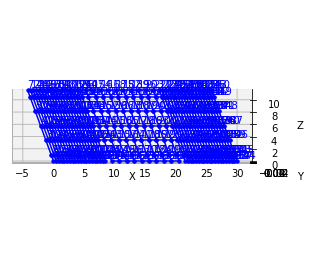

In [6]:
    # assign grillage member to element groups of grillage model
variant_one_model.set_member(longitudinal_beam, member="interior_main_beam")
variant_one_model.set_member(longitudinal_beam, member="exterior_main_beam_1")
variant_one_model.set_member(longitudinal_beam, member="exterior_main_beam_2")
variant_one_model.set_member(edge_longitudinal_beam, member="edge_beam")
variant_one_model.set_member(transverse_slab, member="transverse_slab")
variant_one_model.set_member(end_transverse_slab, member="start_edge")
variant_one_model.set_member(end_transverse_slab, member="end_edge")
#sn3615.set_member(stich_slab, member="stitch_elements")

variant_one_model.create_osp_model(pyfile=False)
og.opsv.plot_model(element_labels=0, az_el=(-90, 0))  # plotting using ops_vis
og.plt.show()

For the second variant, we set `continuous=` keyword argument as False. This results in a gap between each meshes. This variant can be useful for creating multiple non-connecting meshes in the same model space.

Note for this variant, the distance between meshes must be provided to the `non_cont_spacing_x=`  keyword argument

In [7]:
variant_two_model = og.create_grillage(
        bridge_name=bridge_name,
        long_dim=L,
        width=w,
        skew=angle,
        num_long_grid=n_l,
        num_trans_grid=n_t,
        edge_beam_dist=edge_dist,
        # ext_to_int_dist=ext_to_int_dist,
        mesh_type=mesh_type,
        multi_span_dist_list=spans,
        multi_span_num_points=[20,10,20],
        continuous=False,
        non_cont_spacing_x=stich_slab_x_spacing,
    )

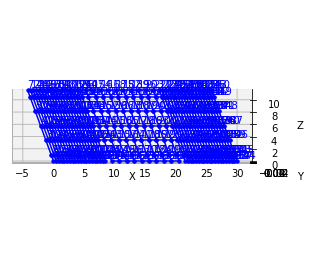

In [8]:
variant_two_model.set_member(longitudinal_beam, member="interior_main_beam")
variant_two_model.set_member(longitudinal_beam, member="exterior_main_beam_1")
variant_two_model.set_member(longitudinal_beam, member="exterior_main_beam_2")
variant_two_model.set_member(edge_longitudinal_beam, member="edge_beam")
variant_two_model.set_member(transverse_slab, member="transverse_slab")
variant_two_model.set_member(end_transverse_slab, member="start_edge")
variant_two_model.set_member(end_transverse_slab, member="end_edge")

variant_two_model.create_osp_model(pyfile=False)
og.opsv.plot_model(element_labels=0, az_el=(-90, 0))  # plotting using ops_vis
og.plt.show()

The third variant is similar to second variant but with the definition of stiching elements between meshes. For this, a `GrillageMember` object is required to define the stitch elements between the meshs

In [9]:
stitch_slab_section = og.create_section(
    A=0.504 * m2,
    J=5.22303e-3 * m3,
    Iy=0.32928 * m4,
    Iz=1.3608e-3 * m4,
    Ay=0.42 * m2,
    Az=0.42 * m2,
)
stich_slab = og.create_member(section=stitch_slab_section, material=concrete)

In [10]:
variant_three_model = og.create_grillage(
        bridge_name=bridge_name,
        long_dim=L,
        width=w,
        skew=angle,
        num_long_grid=n_l,
        num_trans_grid=n_t,
        edge_beam_dist=edge_dist,
        mesh_type=mesh_type,
        multi_span_dist_list=spans,
        multi_span_num_points=[20,10,20],
        continuous=False,
        non_cont_spacing_x=stich_slab_x_spacing,
    )

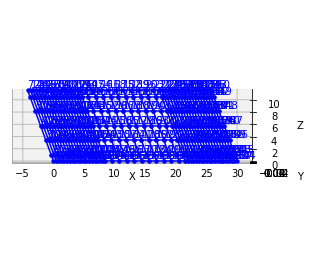

In [11]:
variant_three_model.set_member(longitudinal_beam, member="interior_main_beam")
variant_three_model.set_member(longitudinal_beam, member="exterior_main_beam_1")
variant_three_model.set_member(longitudinal_beam, member="exterior_main_beam_2")
variant_three_model.set_member(edge_longitudinal_beam, member="edge_beam")
variant_three_model.set_member(transverse_slab, member="transverse_slab")
variant_three_model.set_member(end_transverse_slab, member="start_edge")
variant_three_model.set_member(end_transverse_slab, member="end_edge")
variant_three_model.set_member(stich_slab, member="stitch_elements")

variant_three_model.create_osp_model(pyfile=False)
og.opsv.plot_model(element_labels=0, az_el=(-90, 0))  # plotting using ops_vis
og.plt.show()